# Дифференциальная эволюция

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import approx_fprime
from scipy.optimize import differential_evolution
from sympy import *

In [3]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

### Зависимость от размера популяции

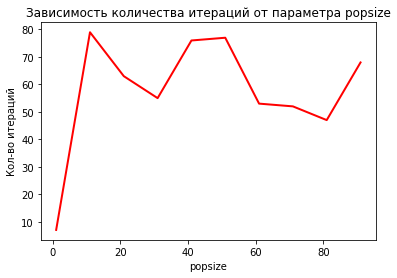

In [62]:
res  =  [] 
param  =  [] 
for  i  in range(1, 100, 10):
    res.append(differential_evolution(ackley,  bounds,  popsize=i, mutation=(0,1.9), seed=42 )['nit'])
    param.append(i)
    

plt.plot(param,  res, color = 'r', linewidth = 2)
plt.title('Зависимость количества итераций от параметра popsize')
plt.ylabel('Кол-во итераций') 
plt.xlabel('popsize') 
plt.show()

### Зависимость от показателей мутации

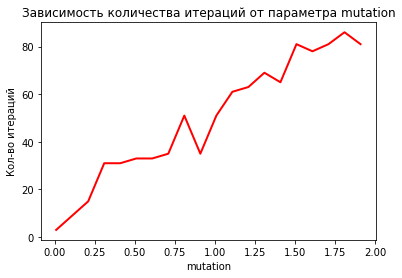

In [75]:
res  =  [] 
param  =  [] 
for  i  in range(1, 200, 10):
    res.append(differential_evolution(ackley,  bounds,  popsize=10, mutation=(0,i/100), seed=42 )['nit'])
    param.append(i/100)
    

plt.plot(param,  res, color = 'r', linewidth = 2)
plt.title('Зависимость количества итераций от параметра mutation')
plt.ylabel('Кол-во итераций') 
plt.xlabel('mutation') 
plt.show()

### Зависимость от типа стратегии

In [71]:
strategy =[ 'best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 
            'currenttobest1exp', 'best2exp', 'rand2exp', 'randtobest1bin', 
            'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin']


for  i  in strategy:
    print(i, '\t', differential_evolution(ackley,  bounds,  popsize=10, mutation=(0,1), seed=42, strategy=i)['nit'])

best1bin 	 35
best1exp 	 77
rand1exp 	 196
randtobest1exp 	 139
currenttobest1exp 	 1000
best2exp 	 105
rand2exp 	 216
randtobest1bin 	 80
currenttobest1bin 	 1000
best2bin 	 71
rand2bin 	 149
rand1bin 	 130
